# **ABOUT HEART ATTACK**

> A heart attack (Cardiovascular diseases) occurs when the flow of blood to the heart muscle suddenly becomes blocked. From WHO statistics every year 17.9 million dying from heart attack. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart attack.

> <img style="float: centre;" src="https://img.lovepik.com/photo/50074/6189.jpg_wh860.jpg" width="600px"/>

> This dataset contain some medical information of patients which tells whether that person getting a heart attack chance is less or more. Using the information explore the dataset and classify the target variable using different Machine Learning models and findout which algorithm suitable for this dataset.

currentSmoker - information about a patient if he/she is a smoker

cigsPerDay - Amount of consumption if patient is a smoker

Health information of patient
BPMeds - If a patient is taking BP

prevalentStroke - Status of stroke occurance

prevalentHyp - Status of prevailing hyper tension

diabetes - Status of diabetes

totChol - Cholestrol level

sysBP - Blood pressure level

diaBP - Diastolic blood pressure

sysBP - Systolic blood pressure

BMI - Body mass Index

heartRate - Heart rate reading

gluscose - Glucose level

TARGET TenYearCHD - status if will suffer a risk of coronary disease in next ten years

## Table of Contents
1) Import Packages

2) EDA

3) Preparing ML models

4) Models evaluation

5) Ensembling

6) Conclusion

## Packages Required

In [21]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
# data preprocessing

from sklearn.preprocessing import StandardScaler


# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [22]:
data = pd.read_csv('../data/framingham.csv')
data = data.drop(["education"],axis=1)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


## **EDA**

In [24]:
data.isna().sum().sort_values(ascending = False)

glucose            388
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [25]:
data.dropna(inplace = True)
data.isna().sum().sort_values(ascending = False)

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## **Model prepration**

In [26]:
y = data["TenYearCHD"]
X = data.drop('TenYearCHD',axis=1)


**Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem**

In [27]:
# get the count of y
y.value_counts()


TenYearCHD
0    3177
1     572
Name: count, dtype: int64

## Scaling
The Nearest Neighbor algorithm uses "distance" so variables with a larger scale will be more heavily weighted. Scaling our X values into a new dataframe will alieviate this.

Standardize features by removing the mean and scaling to unit variance

This means, given an input x, transform it to (x-mean)/std (where all dimensions and operations are well defined).

So even if your input values are all positive, removing the mean can make some of them negative:

In [28]:
#create a new dataframe with scaled features, but only for non-categorical features
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[X.columns] = scaler.fit_transform(X)
X_scaled.head()



,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.116358,-1.234664,-0.977057,-0.755427,-0.177093,-0.075054,-0.673128,-0.167237,-0.940551,-1.195789,-1.083977,0.285424,0.359319,-0.204446
1,-0.895770,-0.417687,-0.977057,-0.755427,-0.177093,-0.075054,-0.673128,-0.167237,0.292509,-0.515486,-0.162065,0.718351,1.613902,-0.246314
2,1.116358,-0.184266,1.023482,0.922305,-0.177093,-0.075054,-0.673128,-0.167237,0.180413,-0.220689,-0.245875,-0.115525,-0.058875,-0.497519
3,-0.895770,1.332976,1.023482,1.761172,-0.177093,-0.075054,1.485602,-0.167237,-0.267973,0.799765,1.011277,0.681454,-0.895264,0.884110
4,-0.895770,-0.417687,1.023482,1.173965,-0.177093,-0.075054,-0.673128,-0.167237,1.077184,-0.107305,0.089365,-0.666523,0.777513,0.130494


## **ML models**

Here I take different machine learning algorithm and try to find algorithm which predict accurately.

1. Logistic Regression
2. K-Nearest Neighbour



In [29]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X, y)
lr_predict = lr.predict(X)
lr_conf_matrix = confusion_matrix(y, lr_predict)
lr_acc_score = accuracy_score(y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y,lr_predict))

confussion matrix
[[3155   22]
 [ 545   27]]


Accuracy of Logistic Regression: 84.87596692451321 

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3177
           1       0.55      0.05      0.09       572

    accuracy                           0.85      3749
   macro avg       0.70      0.52      0.50      3749
weighted avg       0.81      0.85      0.79      3749



/Users/ericcoopey/repos/dsa411_s25/dsa411/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# print the equation of the line using the coeficients and intercept
print("Intercept of the line: ", lr.intercept_)
print("Equation of the line: ", end="")
for i in range(len(X.columns)):
    print(f"{lr.coef_[0][i]}*{X.columns[i]} + ", end="")



Intercept of the line:  [-0.4203632]
Equation of the line: 0.5311943982017714*male + 0.029319002741718735*age + -0.2492064234061308*currentSmoker + 0.019840021938765832*cigsPerDay + 0.15962648136276744*BPMeds + 0.057250217907467635*prevalentStroke + 1.0170275455526103*prevalentHyp + 0.1780074822989892*diabetes + -0.0012743902852426047*totChol + 0.013702309160985313*sysBP + -0.03091469674538268*diaBP + -0.04551062595310396*BMI + -0.022083201976019158*heartRate + 0.004715024134905068*glucose + 

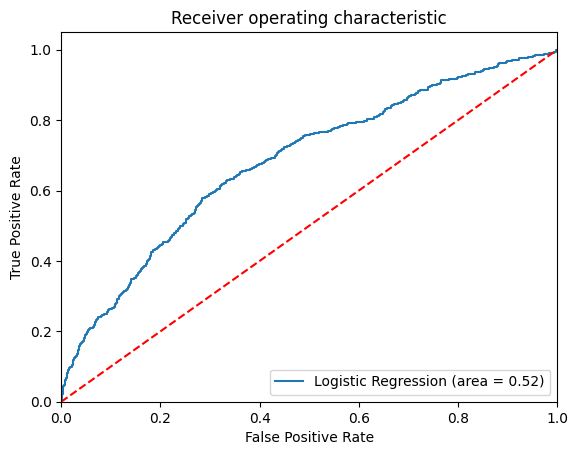

In [31]:
#generate ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y, lr.predict(X))
fpr, tpr, thresholds = roc_curve(y, lr.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [32]:
#use statsmodels to do a logistic regression on X and y 
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.400181
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3735
Method:                           MLE   Df Model:                           13
Date:                Fri, 07 Feb 2025   Pseudo R-squ.:                 0.06313
Time:                        11:55:34   Log-Likelihood:                -1500.3
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 4.824e-36
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.4093      0.103      3.980      0.000       0.208       0.611
age           

In [33]:
# use the logit_model to predict the y values
y_pred = result.predict(X)
y_pred = [0 if x < 0.5 else 1 for x in y_pred]
confusion_matrix(y, y_pred)



array([[3152,   25],
       [ 546,   26]])

In [34]:
#remove the columns with p-value > 0.05
X_revised = X.drop(["BPMeds","currentSmoker","glucose","prevalentStroke","totChol"],axis=1)

In [35]:
#use statsmodels to do a logistic regression on X_revised and y
logit_model2=sm.Logit(y,X_revised)
result3=logit_model2.fit()
print(result3.summary())


Optimization terminated successfully.
         Current function value: 0.401545
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3740
Method:                           MLE   Df Model:                            8
Date:                Fri, 07 Feb 2025   Pseudo R-squ.:                 0.05994
Time:                        11:55:35   Log-Likelihood:                -1505.4
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 3.129e-37
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
male             0.4169      0.102      4.093      0.000       0.217       0.617
age              0.0269

In [36]:
# use the logit_model2 to predict the y values and generate the confusion matrix
y_pred2 = result3.predict(X_revised)
y_pred2 = [0 if x < 0.5 else 1 for x in y_pred2]
confusion_matrix(y, y_pred2)


array([[3156,   21],
       [ 552,   20]])

In [37]:
# get precision, recall, f1-score
print(classification_report(y, y_pred2))


              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3177
           1       0.49      0.03      0.07       572

    accuracy                           0.85      3749
   macro avg       0.67      0.51      0.49      3749
weighted avg       0.80      0.85      0.79      3749



In [38]:
# use KNN to predict the y values using X_scaled
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_scaled, y)
knn_predict = knn.predict(X_scaled)
knn_conf_matrix = confusion_matrix(y, knn_predict)
knn_acc_score = accuracy_score(y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of KNN:",knn_acc_score*100,'\n')
print(classification_report(y,knn_predict))


confussion matrix
[[3169    8]
 [ 551   21]]


Accuracy of KNN: 85.08935716190985 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3177
           1       0.72      0.04      0.07       572

    accuracy                           0.85      3749
   macro avg       0.79      0.52      0.49      3749
weighted avg       0.83      0.85      0.79      3749

